# Importing the dataset
## Source : 


In [1]:
import pandas as pd
import os
import pandas
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
dataset = pd.read_csv('../Dataset/data.csv', sep='|')

## About the dataset

In [3]:
dataset.head()    #Top 5 row of the dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [4]:
dataset.tail()     #Last 5 row of the dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0
138046,VirusShare_d7648eae45f09b3adb75127f43be6d11,d7648eae45f09b3adb75127f43be6d11,332,224,258,11,0,111616,468480,0,...,4,4.407252,1.980482,6.115374,96625.000000,20,318464,72,0,0


In [5]:
dataset.columns    # name of the columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [6]:
dataset.describe(include="all")    # summary of numeric attributes

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047,138047,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
unique,107488,138047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,mshtml.dll,631ea355665f28d4707448e442fbf5b8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,187,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,NaN,NaN,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,NaN,NaN,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,NaN,NaN,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,NaN,NaN,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000


In [7]:
dataset.info()    # info about the whole dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

In [8]:
dataset["legitimate"].value_counts()    # count of malware (0) and benign (1) files in dataset


legitimate
0    96724
1    41323
Name: count, dtype: int64

<Axes: ylabel='count'>

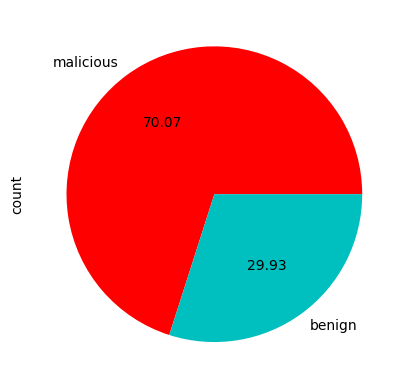

In [9]:
dataset["legitimate"].value_counts().plot.pie(
    labels=['malicious','benign'],
    colors =['r','c'],
    autopct="%.2f",
)

Correlation heat map of the features

<Axes: >

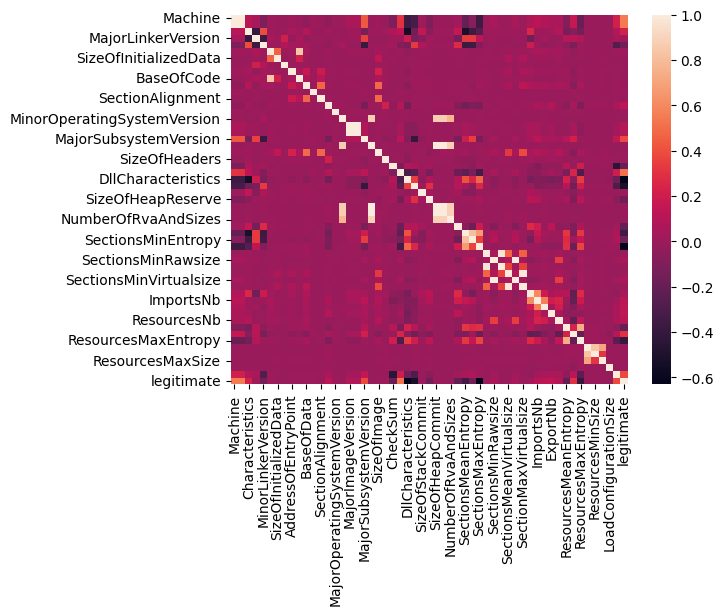

In [10]:
corr = dataset.drop(['Name','md5'],axis=1).corr()
sns.heatmap(corr)

#### Feature Selection

In [11]:
# Feature
X = dataset.drop(['Name','md5','legitimate'],axis=1).values    #Droping this because classification model will not accept object type elements (float and int only)
# Target variable
y = dataset['legitimate'].values

# Training Base model

The base model will be trained with all features

In [12]:
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X, y, test_size=0.7, stratify=y)

base_model = RandomForestClassifier()
base_model.fit(X_base_train, y_base_train)
base_score = base_model.score(X_base_test,y_base_test)
print(f'Base score: {base_score*100:.4f}')


Base score: 99.2922


## Base model confusion matrix

Text(50.72222222222221, 0.5, 'True Labels')

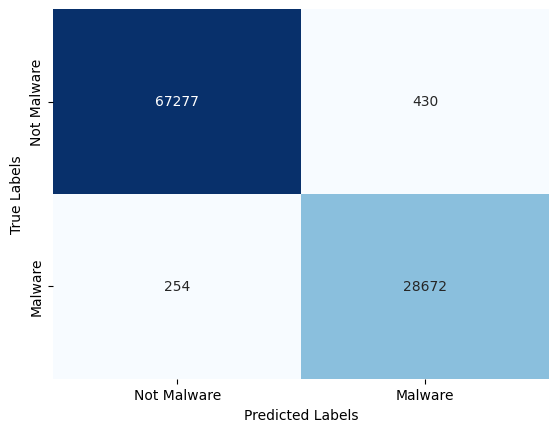

In [13]:

y_pred_base = base_model.predict(X_base_test)

base_matrix = confusion_matrix(y_base_test, y_pred_base)
ax = sns.heatmap(base_matrix, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=['Not Malware', 'Malware'], yticklabels=['Not Malware', 'Malware'])
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Training Random Forest with importance features only

## Data Fitting and choosing the important variables

We use **ExtraTreesClassifier** to build the forest of trees from dataset, then use **SelectFromModel** fuction to get the only most importance features

In [14]:
extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]

In [15]:
#Print important features
index = numpy.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]
for i in range(nbfeatures):
    print(f'{i+1}. {dataset.columns[2+index[i]]}')

1. DllCharacteristics
2. Characteristics
3. Machine
4. SectionsMaxEntropy
5. VersionInformationSize
6. MajorSubsystemVersion
7. ImageBase
8. Subsystem
9. ResourcesMaxEntropy
10. ResourcesMinEntropy
11. SizeOfOptionalHeader
12. MajorOperatingSystemVersion
13. ResourcesMinSize


In [16]:
#splitting the data (70% - training and 30% - testing)
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.7, stratify = y)

In [17]:
features = []

### All the required features

In [18]:
for f in range(nbfeatures):
    print(f"{f+1}. feature {dataset.columns[2+index[f]]} {extratrees.feature_importances_[index[f]]*100:.2f}%")
    features.append(dataset.columns[2+f])

1. feature DllCharacteristics 15.61%
2. feature Characteristics 10.03%
3. feature Machine 8.80%
4. feature SectionsMaxEntropy 7.80%
5. feature VersionInformationSize 6.40%
6. feature MajorSubsystemVersion 6.10%
7. feature ImageBase 5.31%
8. feature Subsystem 4.53%
9. feature ResourcesMaxEntropy 3.96%
10. feature ResourcesMinEntropy 3.47%
11. feature SizeOfOptionalHeader 3.39%
12. feature MajorOperatingSystemVersion 2.41%
13. feature ResourcesMinSize 1.89%


Testing which Classifier

In [19]:
clf = ek.RandomForestClassifier()
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print (f"Score: {score*100:.4f}%")


Score: 99.2156%


Confusion matrix

Text(50.72222222222221, 0.5, 'True Labels')

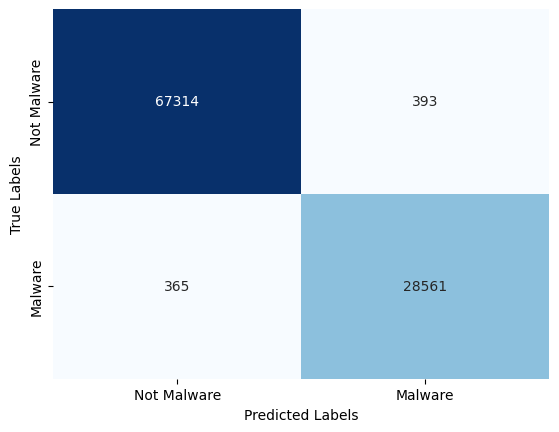

In [20]:
y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=['Not Malware', 'Malware'], yticklabels=['Not Malware', 'Malware'])
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')